# Data Exploration
This notebook is created for visulalising the data and try out different ways to fit copula.


## Data
Three datasets. 
1. Bitcoin Future from CME
    - Downloaded from Bloomberg
    - From 2017-12-15 to 2020-09-04
    - Consist of BTCU0, BTCM0, BTCH0, BTCZ9, BTCU19, BTCM19, BTCH19, BTCZ18, and BTCU18. 
    - OHLC and volume data
    - Daily data

2. BRR 
    - BRR is the reference rate of Bitcoin used by the Bitcoin future
    - Same period of time of Bitcoin future
    - Also from Bloomberg
    
3. CRIX
    - Download from CRIX http://data.thecrix.de/data/crix.json
    - Daily data
    - from 2014-07-31 to 2020-09-14
    - Weights of constituents change across time; Dataset does not include this;

## Marginals (MLE)
We model RS and RF by t-distribution. Parameter fitting is done by scipy.stats.t.fit(). It is a maximium likelihood method. 

## Kendall's Tau (non parametric)
Using scipy is the easiest way to get kendall's tau. (https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html)

According to the documentation of Scipy, the function return the 1945 "tau-b" version of Kendall's tau. 

(We need literatures of how to fit a copula!)

In [151]:
import pandas as pd
import numpy as np
from scipy import stats
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from functools import partial

from copulae1 import *

In [16]:
data = pd.read_csv("../data/btc future and reference rate/coingecko_future.csv", ',')

In [152]:
C = Plackett({'theta':10}, stats.uniform, stats.uniform)

In [154]:
Mean1 = []
Mean2 = []
Var1 = []
Var2 = []
Dep = []
window = 200

for i in range(len(data)-window):
    rs = data.iloc[i:i+window, 4]
    rf = data.iloc[i:i+window, 5]
    u = ECDF(rs)(rs)
    v = ECDF(rf)(rf)
    Mean1.append(np.mean(rs))
    Mean2.append(np.mean(rf))
    Var1.append(np.var(rs)**0.5)
    Var2.append(np.var(rf)**0.5)
#     Dep.append(stats.pearsonr(rs, rf)[0])
#     Dep.append(stats.kendalltau(rs, rf)[0])
    
    C = Plackett({'theta':10}, stats.uniform, stats.uniform)
    C.canonical_calibrate(u,v)
    Dep.append(C.theta)

Optimization terminated successfully.
         Current function value: -1.059084
         Iterations: 47
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -1.059563
         Iterations: 48
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -1.051046
         Iterations: 46
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -1.051630
         Iterations: 47
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: -1.049599
         Iterations: 47
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -1.042362
         Iterations: 48
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -1.052665
         Iterations: 47
         Function evaluations: 107
Optimization termina

Optimization terminated successfully.
         Current function value: -1.082446
         Iterations: 51
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: -1.079046
         Iterations: 48
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -1.085919
         Iterations: 49
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: -1.079586
         Iterations: 48
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: -1.087089
         Iterations: 47
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -1.086980
         Iterations: 48
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -1.088749
         Iterations: 51
         Function evaluations: 115
Optimization termina

Optimization terminated successfully.
         Current function value: -1.103398
         Iterations: 48
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -1.123214
         Iterations: 50
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: -1.146967
         Iterations: 48
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: -1.149993
         Iterations: 47
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -1.154760
         Iterations: 48
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -1.160199
         Iterations: 47
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -1.174749
         Iterations: 49
         Function evaluations: 108
Optimization termina

Optimization terminated successfully.
         Current function value: -0.993303
         Iterations: 48
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: -0.992426
         Iterations: 48
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: -0.991768
         Iterations: 48
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: -0.997509
         Iterations: 47
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -1.014220
         Iterations: 48
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: -1.037373
         Iterations: 49
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -1.033826
         Iterations: 48
         Function evaluations: 107
Optimization termina

Optimization terminated successfully.
         Current function value: -0.960926
         Iterations: 47
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -0.952392
         Iterations: 46
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: -0.954079
         Iterations: 47
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -0.949420
         Iterations: 47
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: -0.952428
         Iterations: 46
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -0.958772
         Iterations: 48
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -0.968129
         Iterations: 47
         Function evaluations: 106
Optimization termina

Optimization terminated successfully.
         Current function value: -0.911133
         Iterations: 47
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -0.905976
         Iterations: 47
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -0.902868
         Iterations: 46
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -0.909147
         Iterations: 47
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -0.915144
         Iterations: 46
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -0.925810
         Iterations: 46
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: -0.924423
         Iterations: 46
         Function evaluations: 104
Optimization termina

Optimization terminated successfully.
         Current function value: -1.098547
         Iterations: 48
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: -1.098789
         Iterations: 49
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: -1.093317
         Iterations: 48
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: -1.081470
         Iterations: 49
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: -1.072271
         Iterations: 47
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: -1.064743
         Iterations: 47
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -1.084784
         Iterations: 48
         Function evaluations: 103
Optimization termina

Optimization terminated successfully.
         Current function value: -0.974446
         Iterations: 46
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -0.968457
         Iterations: 46
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: -0.984552
         Iterations: 47
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: -0.977048
         Iterations: 46
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: -0.978352
         Iterations: 47
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: -0.964259
         Iterations: 47
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -0.960064
         Iterations: 47
         Function evaluations: 106
Optimization termina

In [177]:
Var1 = np.array(Var1)
Var2 = np.array(Var2)

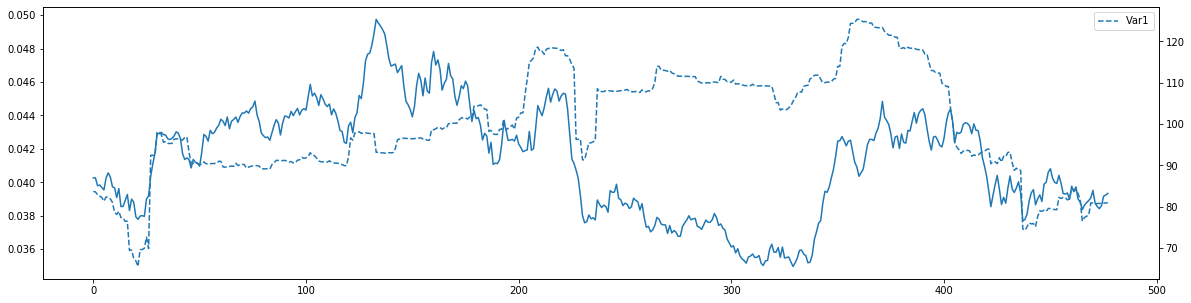

In [170]:
fig, ax1 = plt.subplots(figsize=(20,5))


# ax1.plot(Mean1, '--', label='Mean1')
# ax1.plot(Mean2,'--',  label='Mean2')
ax1.plot(Var1, '--', label='Var1')
# ax1.plot(Var2, '--', label='Var2')
plt.legend()
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(Dep, label='Tau')


In [195]:
# X = np.array([Mean1, Mean2, Var1, Var2]).T
# X = np.array([Var1, Var2]).T
X = np.array([np.abs(Var1-Var2)]).T

y = (Dep)

In [196]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
(est2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     46.51
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           2.78e-11
Time:                        20:33:07   Log-Likelihood:                -1893.1
No. Observations:                 478   AIC:                             3790.
Df Residuals:                     476   BIC:                             3799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.1747      1.703     60.007      0.000      98.829     105.520
x1         -3067.0223    449.732     -6.820      0.000   -3950.728   -2183.316
==============================================================================
Omnibus:                       69.550   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.916
Skew:                           0.188   Prob(JB):                     4.74e-05
Kurtosis:                       2.073   Cond. No.                         773.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
r = requests.get('http://data.thecrix.de/data/crix.json')
crix = pd.DataFrame(r.json())

In [79]:
crix.loc[:,'date'] = pd.to_datetime(crix.loc[:,'date'])

In [173]:
crix.head()

,date,price,log return
0,2014-07-31,1000.000000,NaN
1,2014-08-01,1018.202717,0.018039
2,2014-08-02,1008.772389,-0.009305
3,2014-08-03,1004.416500,-0.004327
4,2014-08-04,1004.984138,0.000565


In [81]:
crix.loc[1:,'log return'] = np.log(crix.price.values[1:]/crix.price.values[:-1])

In [82]:
future = pd.read_excel("../data/Crypto related/BTC CME Future.xlsx")
future.loc[:,'Date'] = pd.to_datetime(future.loc[:,'Date'])

In [83]:
future = future.loc[:,['Date','Last Price']]
future.loc[1:,'log return'] = np.log(future.loc[:,'Last Price'].values[1:]/future.loc[:,'Last Price'].values[:-1])
f = future.loc[:,['Date', 'log return']]

In [174]:
f.head()

,Date,log return
0,2020-09-04,NaN
1,2020-09-03,0.022642
2,2020-09-02,0.066752
3,2020-09-01,0.052274
4,2020-08-31,-0.020076


In [128]:
brr = pd.read_excel("../data/Crypto related/BRR index.xlsx")
brr.loc[:,'Date'] = pd.to_datetime(brr.loc[:,'Date'])

In [175]:
future_crix = pd.merge(left=f, right=crix, how='inner', left_on='Date', right_on='date', suffixes=(' future',' crix'))
future_crix.head()

,Date,log return future,date,price,log return crix
0,2020-09-04,NaN,2020-09-04,29614.314902,-0.109754
1,2020-09-03,0.022642,2020-09-03,33049.664458,-0.046514
2,2020-09-02,0.066752,2020-09-02,34623.237089,0.023061
3,2020-09-01,0.052274,2020-09-01,33833.920615,-0.001434
4,2020-08-31,-0.020076,2020-08-31,33882.473739,0.015976


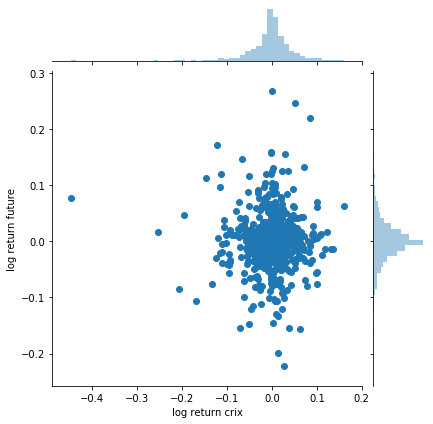

In [160]:
future_crix.head()
# sns.jointplot(data=future_crix.iloc[:,[1,-1]], x="log return crix", y="log return future", kind='kde')
sns.jointplot(data=future_crix.iloc[:,[1,-1]], x="log return crix", y="log return future")

Text(0.5, 1.0, 'Bitcoin Future Log Return CDFs')

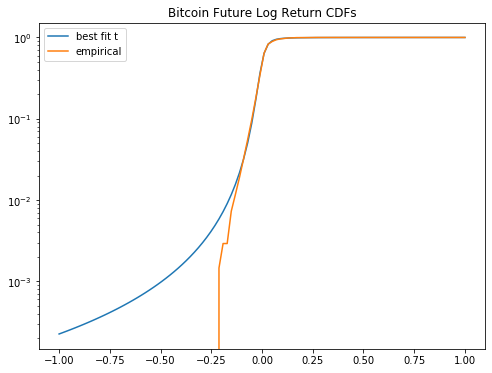

In [166]:
f_df, f_loc, f_scale = stats.t.fit(future_crix.iloc[1:,1])
x = np.linspace(-1,1,100)
y = stats.t(loc=f_loc, scale=f_scale, df=f_df).cdf(x)
ecdf_f = ECDF(future_crix.iloc[1:,1])
plt.figure(figsize=(8,6))
plt.plot(x,y, label='best fit t')
plt.plot(x, ecdf_f(x), label='empirical')
plt.legend()
plt.yscale('log')
plt.title("Bitcoin Future Log Return CDFs")

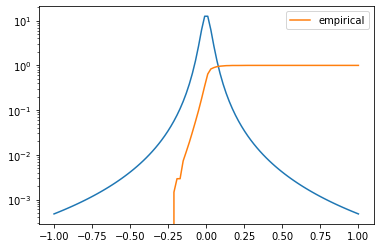

In [170]:
# Log density Plot (TO DO)
plt.plot(x, stats.t(loc=f_loc, scale=f_scale, df=f_df).pdf(x))
plt.plot(x, ecdf_f(x), label='empirical') # Turn it into PDF!
plt.legend()
plt.yscale('log')

Text(0.5, 1.0, 'Crix Log Return CDFs')

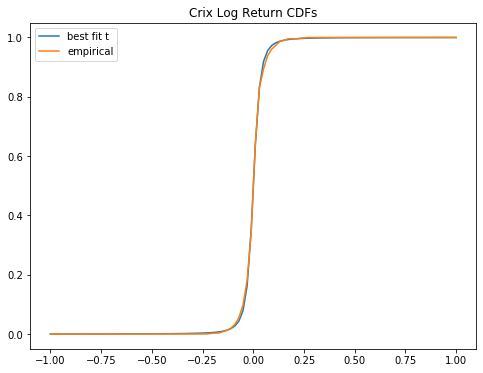

In [137]:
c_df, c_loc, c_scale = stats.t.fit(future_crix.iloc[1:,-1])
x = np.linspace(-1,1,100)
y = stats.t(loc=c_loc, scale=c_scale, df=c_df).cdf(x)
ecdf_c = ECDF(future_crix.iloc[1:,1])
plt.figure(figsize=(8,6))
plt.plot(x,y, label='best fit t')
plt.plot(x, ecdf_c(x), label='empirical')
plt.legend()
plt.title("Crix Log Return CDFs")

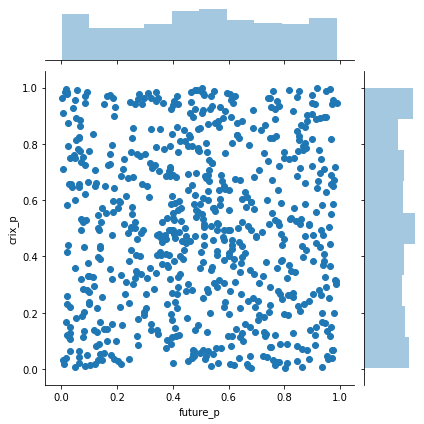

In [138]:
future_t = stats.t(loc=f_loc, scale=f_scale, df=f_df)
crix_t   = stats.t(loc=c_loc, scale=c_scale, df=c_df)
x = future_t.cdf(future_crix.iloc[1:,-1])
y = crix_t.cdf(future_crix.iloc[1:,1])
toplot = pd.DataFrame([x,y]).T
toplot.columns = ['future_p', 'crix_p']
sns.jointplot(data=toplot, x='future_p', y='crix_p')

In [172]:
toplot.corr()

,future_p,crix_p
future_p,1.000000,-0.003311
crix_p,-0.003311,1.000000


In [122]:
tau = stats.kendalltau(future_crix.iloc[1:,1],future_crix.iloc[1:,-1])
tau[0]

-0.00652761864271129

In [157]:
future_crix.iloc[1+20:-(1+20),0]

21    2020-08-06
22    2020-08-05
23    2020-08-04
24    2020-08-03
25    2020-07-31
26    2020-07-30
27    2020-07-29
28    2020-07-28
29    2020-07-27
30    2020-07-24
31    2020-07-23
32    2020-07-22
33    2020-07-21
34    2020-07-20
35    2020-07-17
36    2020-07-16
37    2020-07-15
38    2020-07-14
39    2020-07-13
40    2020-07-10
41    2020-07-09
42    2020-07-08
43    2020-07-07
44    2020-07-06
45    2020-07-02
46    2020-07-01
47    2020-06-30
48    2020-06-29
49    2020-06-26
50    2020-06-25
         ...    
635   2018-03-01
636   2018-02-28
637   2018-02-27
638   2018-02-26
639   2018-02-23
640   2018-02-22
641   2018-02-21
642   2018-02-20
643   2018-02-16
644   2018-02-15
645   2018-02-14
646   2018-02-13
647   2018-02-12
648   2018-02-09
649   2018-02-08
650   2018-02-07
651   2018-02-06
652   2018-02-05
653   2018-02-02
654   2018-02-01
655   2018-01-31
656   2018-01-30
657   2018-01-29
658   2018-01-26
659   2018-01-25
660   2018-01-24
661   2018-01-23
662   2018-01-

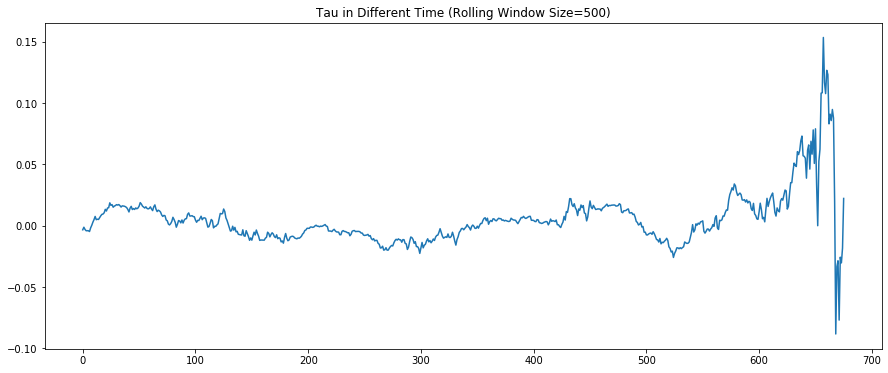

In [184]:
tau_arr = []
p_arr = []
window_size = 500
for t in range(len(future_crix)-10):
    tau = stats.kendalltau(future_crix.iloc[1+t:1+t+window_size,1],future_crix.iloc[1+t:1+t+window_size,-1])
    tau_arr.append(tau[0])
    p_arr.append(tau[1])

plt.figure(figsize=(15,6)) 
plt.title('Tau in Different Time (Rolling Window Size=%s)'%window_size)
plt.plot(tau_arr)

In [183]:
p_arr 

[0.9114652158096285,
 0.9668741626281562,
 0.9199684822071772,
 0.8911005250066029,
 0.8923713579248522,
 0.8911005250066029,
 0.8746063177217591,
 0.9532097945233668,
 0.9908078133119961,
 0.9229468392801012,
 0.8682764694074494,
 0.8005331512720191,
 0.8695417771958079,
 0.8590080568916342,
 0.8644825825696216,
 0.8263120232595408,
 0.7868983199927919,
 0.7573806470280611,
 0.7500543270855087,
 0.7241914068311077,
 0.6555235727046449,
 0.6883539361430893,
 0.6294221383077437,
 0.6237247879846095,
 0.5333270946339819,
 0.5789759090412314,
 0.5660326538227654,
 0.6140909108912449,
 0.593538868997918,
 0.5828306791416182,
 0.5656700751516202,
 0.5740374750043113,
 0.5645830089641952,
 0.5846704761751251,
 0.6110820830895686,
 0.588358149651482,
 0.5913160034713377,
 0.5953941738945996,
 0.6058324249332845,
 0.6227774144158571,
 0.658041412389847,
 0.7075855303014666,
 0.6315167414184985,
 0.5978100048775279,
 0.6593987651394568,
 0.6408829756239005,
 0.6574600179339806,
 0.6282808879536

## Get Density of RH


Clayton:
$\theta = 2 \frac{\tau}{1 - \tau}$

In [123]:
def copula_density_Clayton(u, v, theta):
    A = (1+theta)
    B = (u*v)**(-1-theta)
    C = (-1+(u**-theta)+(v**-theta))**(-2-(1/theta))
    return np.nan_to_num(A*B*C)

def f_Z_2(y1, nS, nF, Law_RS, Law_RF, theta):
    N = 100000
    u2 = np.linspace(0,1,N)
    a = (y1-nF*Law_RF.ppf(u2))/nS
    A = copula_density_Clayton(Law_RS.cdf(a), u2, theta)
    B = Law_RS.pdf(a)
    m = A*B
    return np.sum(((m[1:]+m[:-1])*1/N)/2)/np.abs(nS)

In [136]:
nS = 1
nF_arr = [-0.90,-0.95, -1, -1.05,-1.10]
Law_RS = crix_t
Law_RF = future_t
ny = 1000
y1 = np.linspace(-1,1,ny)

crix_future_result= []

for nF in nF_arr:
    theta  = 2*tau[0]/(1-tau[0])
    fn = partial(f_Z_2, nS=nS, nF=nF, Law_RS= Law_RS, Law_RF=Law_RF, theta=theta)
    v_fn = np.vectorize(fn)
    RH_density = v_fn(y1) 
    crix_future_result.append(RH_density)
    print(nF)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


-0.9
-0.95
-1
-1.05
-1.1


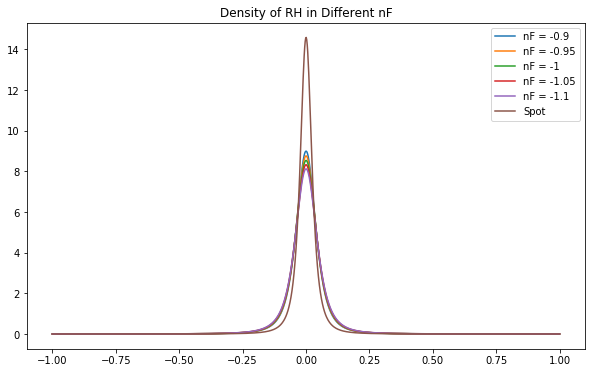

In [146]:
plt.figure(figsize=(10,6))
plt.title('Density of RH in Different nF')
for i, nF in enumerate(nF_arr):
    plt.plot(y1, crix_future_result[i], label='nF = %s'%nF)
# plt.plot(y1, Law_RS.pdf(y1), label='Spot')
plt.legend()